$$
\begin{align}
\frac{d}{dt} \begin{bmatrix} q \\ p \end{bmatrix} = \begin{bmatrix} p \\ -q \end{bmatrix} 
\end{align}
$$

In [16]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [59]:
y0 = [1.0, 0.0]
t0 = np.linspace(0, 500, 500)

def func(y, t):
    return np.array([y[1], -y[0]])

In [60]:
res = odeint(func, y0, t0)
res.shape

(500, 2)

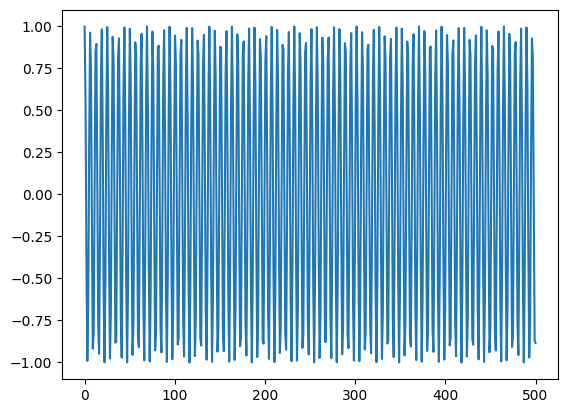

In [61]:
plt.plot(t0, res[:, 0])

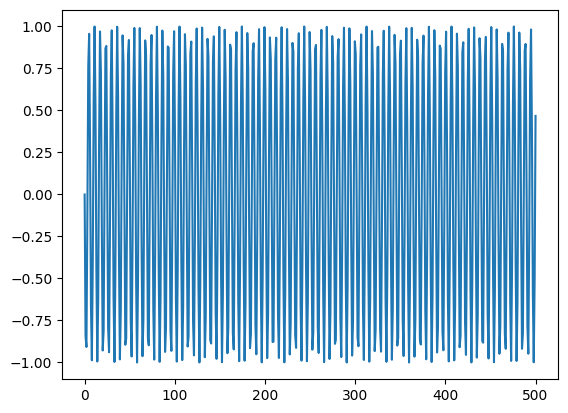

In [62]:
plt.plot(t0, res[:, 1])

In [63]:
def euler(f, y0, t):
    sol = [y0]
    dt = t[1] - t[0]
    q0, p0 = y0
    for i in range(len(t) - 1):
        q = q0 + p0 * dt
        p = p0 - q0 * dt
        sol.append([q, p])
        q0, p0 = q, p
    return np.array(sol)

In [64]:
res2 = euler(func, y0, t0)

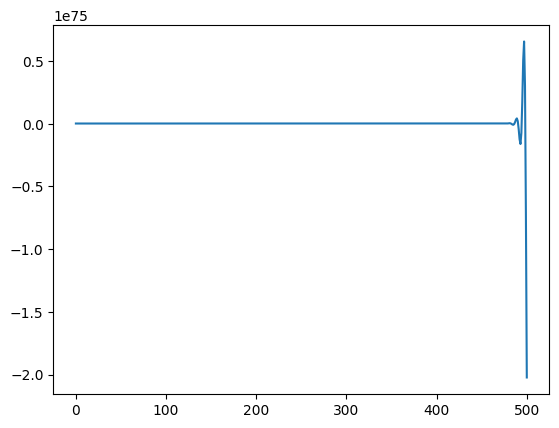

In [65]:
plt.plot(t0, res2[:, 0])

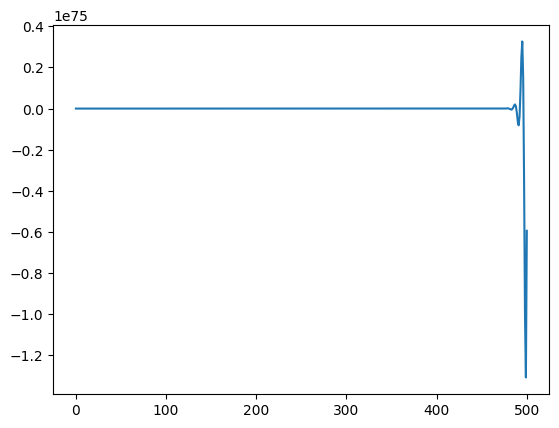

In [66]:
plt.plot(t0, res2[:, 1])

In [67]:
def simp_euler(f, y0, t):
    sol = [y0]
    dt = t[1] - t[0]
    q0, p0 = y0
    for i in range(len(t) - 1):
        p = p0 - q0 * dt
        q = q0 + p * dt
        sol.append([q, p])
        q0, p0 = q, p
    return np.array(sol)

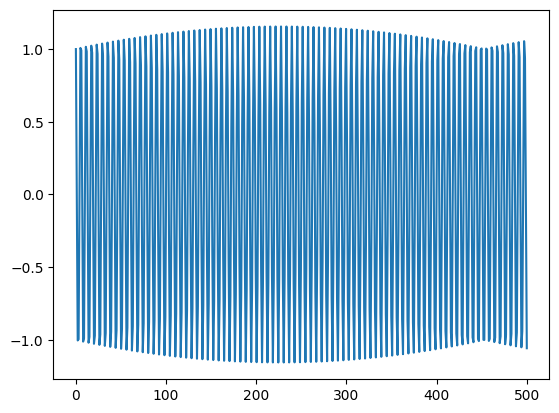

In [68]:
res3 = simp_euler(func, y0, t0)
plt.plot(t0, res3[:, 0])

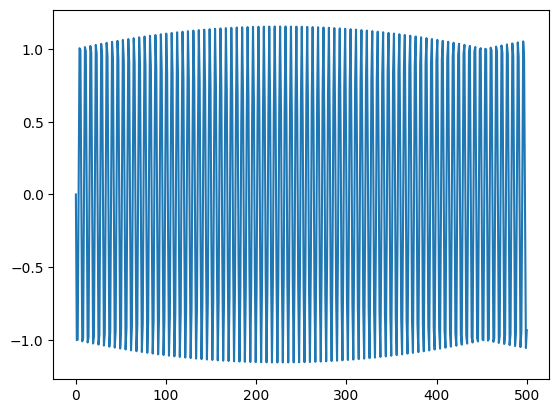

In [69]:
plt.plot(t0, res3[:, 1])

In [70]:
def rk4(f, y0, t):
    sol = []
    dt = t[1] - t[0]
    y0 = np.array(y0)
    y = np.zeros_like(y0)
    for ti in t:
        sol.append(y0)
        k1 = f(y0, ti)
        k2 = f(y0 + dt * k1 * 0.5, ti + 0.5 * dt)
        k3 = f(y0 + dt * k2 * 0.5, ti + 0.5 * dt)
        k4 = f(y0 + dt * k3, ti + dt)
        y = y0 + dt / 6.0 * (k1 + 2 * k2 + 2 * k3 + k4)
        y0 = y
    return np.array(sol)

In [71]:
res4 = rk4(func, y0, t0)

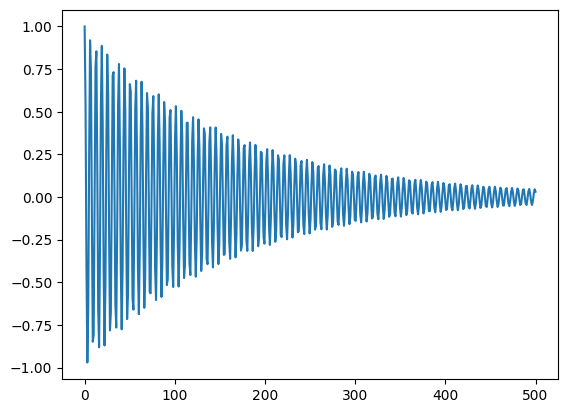

In [72]:
plt.plot(t0, res4[:, 0])